In [1]:
!pip install -Uqq fastbook

In [2]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *
import os

In [3]:
urls = search_images_ddg('rock on the moon surface', max_images=1)
len(urls),urls[0]

(1,
 'https://i.dailymail.co.uk/1s/2019/06/26/22/15299840-7182489-image-a-2_1561584572447.jpg')

In [4]:
dest = Path('images/moon-rock.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

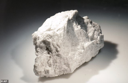

In [5]:
im = Image.open(dest)
im.to_thumb(128,128)

In [6]:
searches = ['craters on moon surface pov', 'rock on moon surface pov']
path = Path('moon-attribs')

if not os.path.exists(path):
    os.makedirs(path)

for o in searches:
    dest = os.path.join(path, o)
    if not os.path.exists(dest):
        os.makedirs(dest)
    results = search_images_ddg(f'{o} moon-attribs')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

KeyError: 'next'

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
is_rock,_,probs = learn.predict(PILImage.create('images/moon-rock.jpg'))
print(f"this is a: {is_rock}.")
print(f"Probability it's a rock: {probs[0]:.4f}")